<a href="https://colab.research.google.com/github/asjadnazir/autosplash/blob/master/magic_gamma_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
clms = ["fLenght","fWidth","fSize","fConc","fConcl","fAsym","fM3Long","fM3Train","fAlpha","fDist",'class']
df = pd.read_csv("magic04.data",names = clms)
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Train,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == 'g').astype(int)

In [ ]:
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Train,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


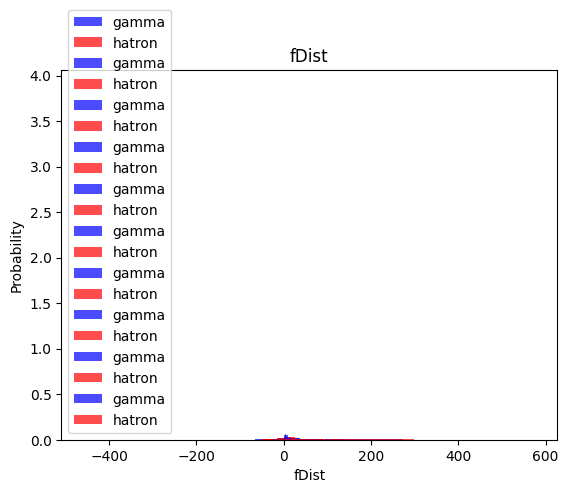

In [ ]:
for label in clms[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hatron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  # plt.show()

In [ ]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  if oversample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data = np.hstack((X,np.reshape(y,(-1,1))))

  return data, X, y

In [ ]:
train , X_train, y_train = scale_dataset(train,True)
valid , X_valid, y_valid = scale_dataset(valid,False)
test , X_test, y_test = scale_dataset(test,False)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1362
           1       0.82      0.81      0.81      2442

    accuracy                           0.76      3804
   macro avg       0.74      0.74      0.74      3804
weighted avg       0.76      0.76      0.76      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
nb_model.predict(X_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      1362
           1       0.82      0.81      0.81      2442

    accuracy                           0.76      3804
   macro avg       0.74      0.74      0.74      3804
weighted avg       0.76      0.76      0.76      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1362
           1       0.84      0.80      0.82      2442

    accuracy                           0.77      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.77      0.77      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1362
           1       0.85      0.87      0.86      2442

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
  return nn_model,history

16 nodes, dropout 0, lr 0.01,batch size 32


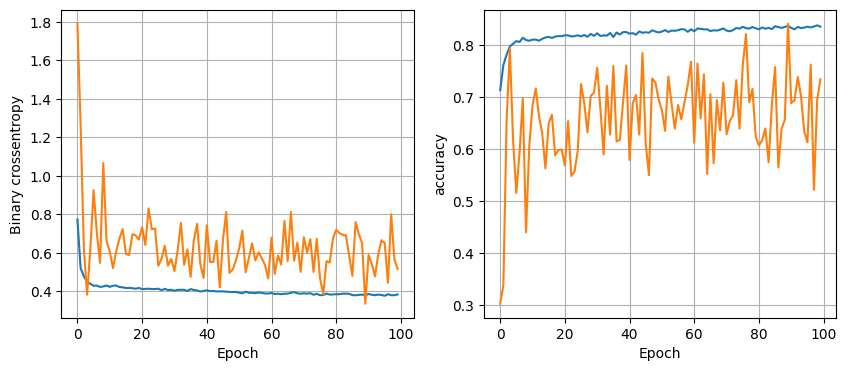

119/119 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8268
Validation Loss: 0.3857451379299164
16 nodes, dropout 0, lr 0.01,batch size 64


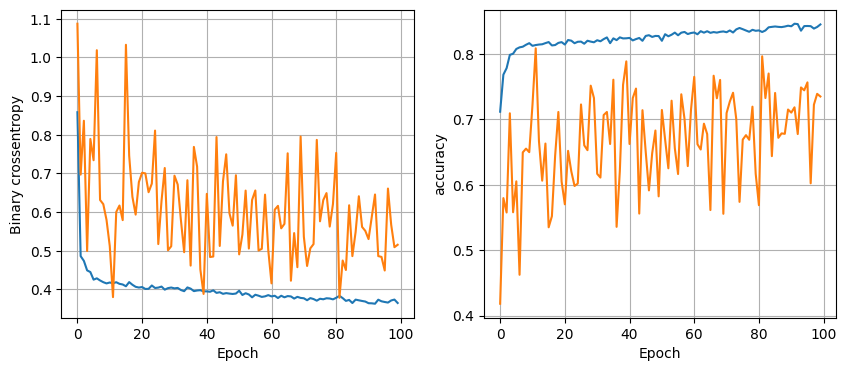

119/119 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8486
Validation Loss: 0.3745027482509613
16 nodes, dropout 0, lr 0.01,batch size 128


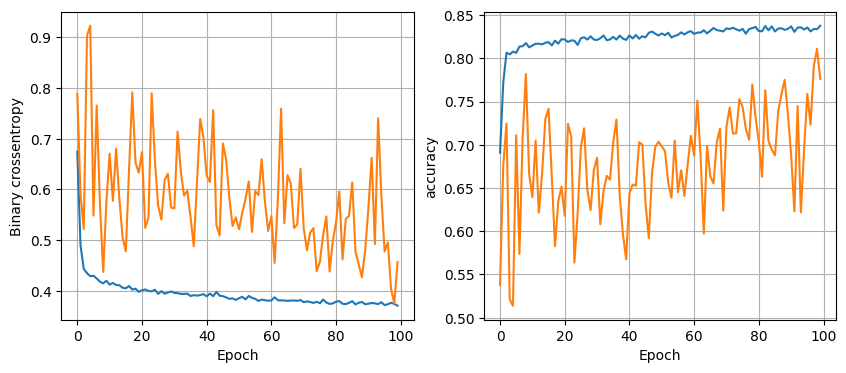

119/119 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8323
Validation Loss: 0.37600037455558777
16 nodes, dropout 0, lr 0.05,batch size 32


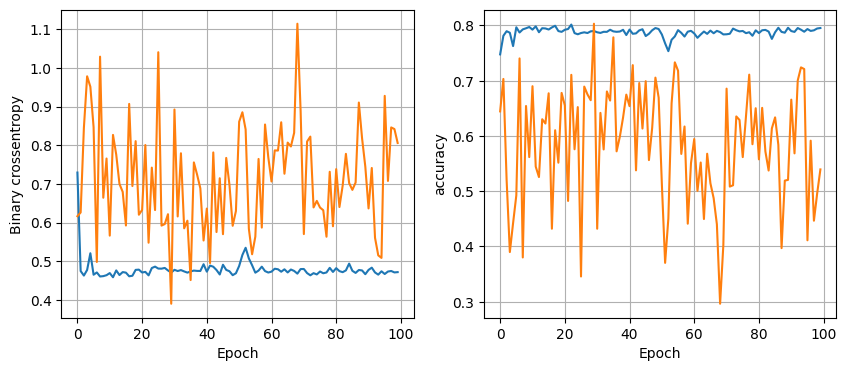

119/119 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8181
Validation Loss: 0.43396422266960144
16 nodes, dropout 0, lr 0.05,batch size 64


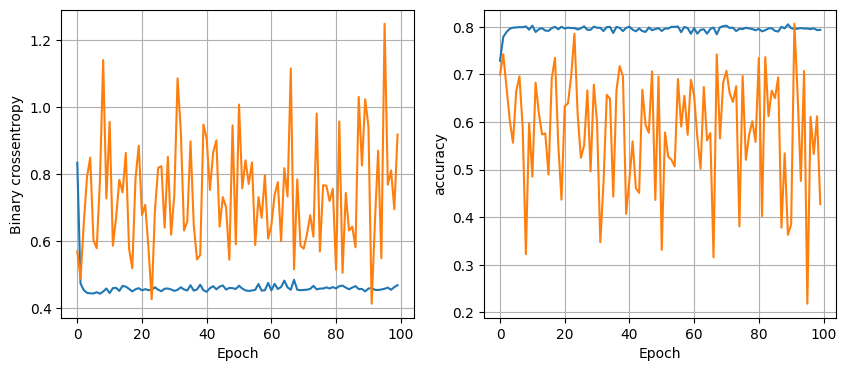

119/119 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8005
Validation Loss: 0.4489630162715912
16 nodes, dropout 0, lr 0.05,batch size 128


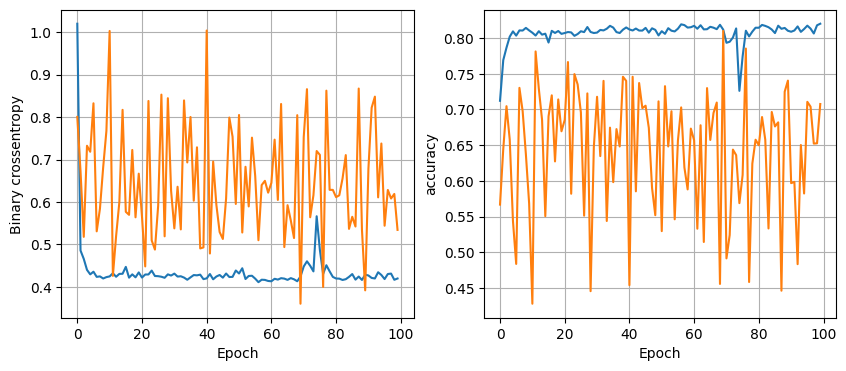

119/119 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8323
Validation Loss: 0.4059787392616272
16 nodes, dropout 0, lr 0.001,batch size 32


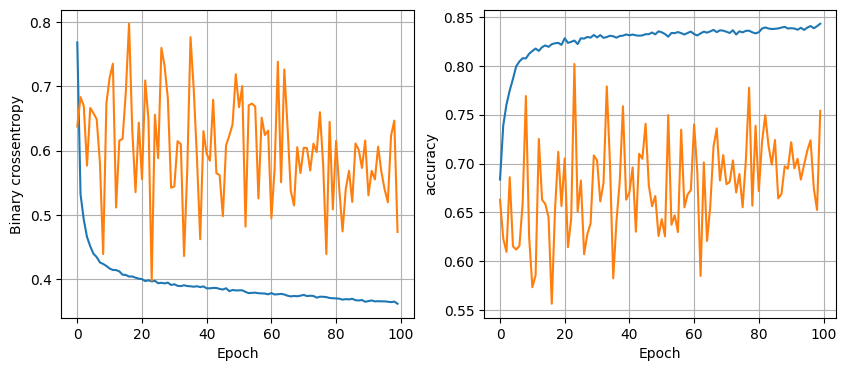

119/119 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8273
Validation Loss: 0.3857044279575348
16 nodes, dropout 0, lr 0.001,batch size 64


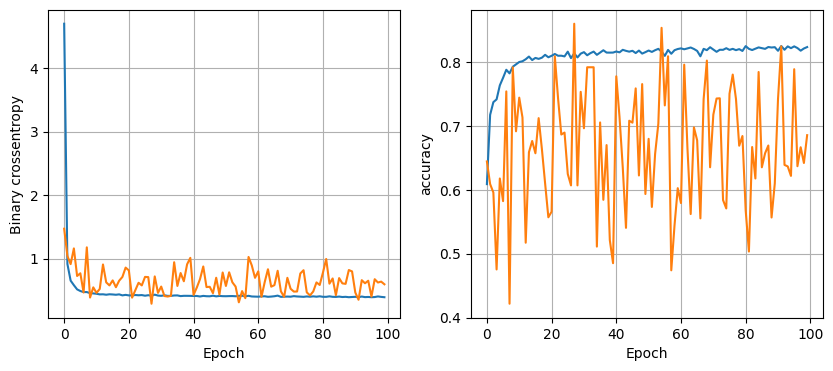

119/119 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8331
Validation Loss: 0.3845013976097107
16 nodes, dropout 0, lr 0.001,batch size 128


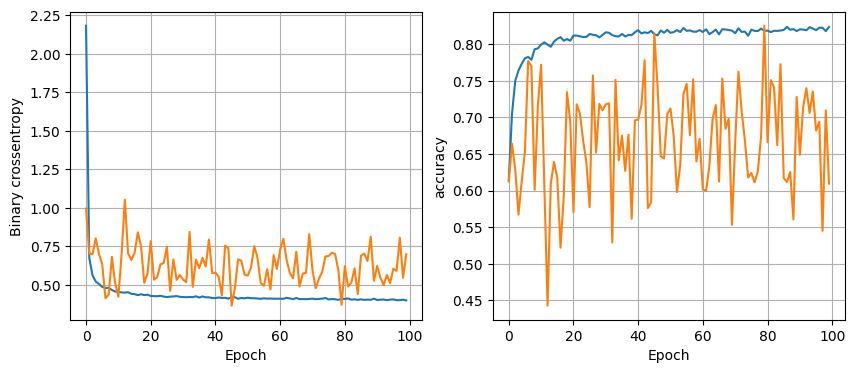

119/119 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8275
Validation Loss: 0.4026823043823242
16 nodes, dropout 0.2, lr 0.01,batch size 32


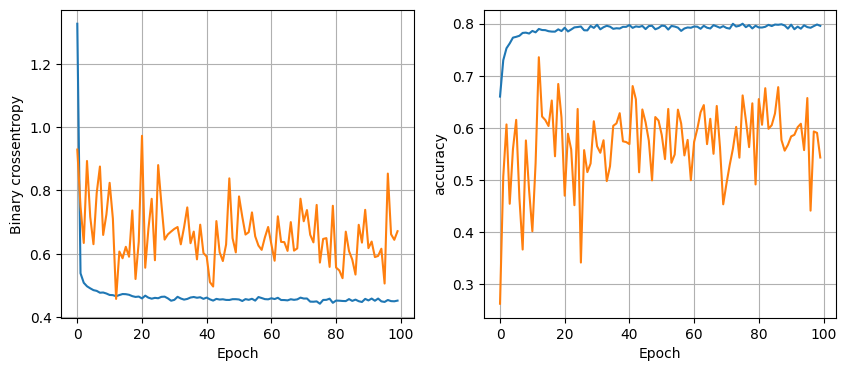

119/119 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8210
Validation Loss: 0.401964008808136
16 nodes, dropout 0.2, lr 0.01,batch size 64


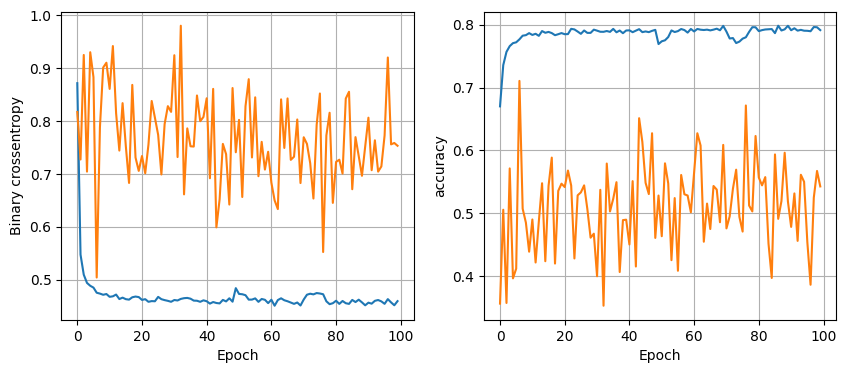

119/119 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.8228
Validation Loss: 0.4157242476940155
16 nodes, dropout 0.2, lr 0.01,batch size 128


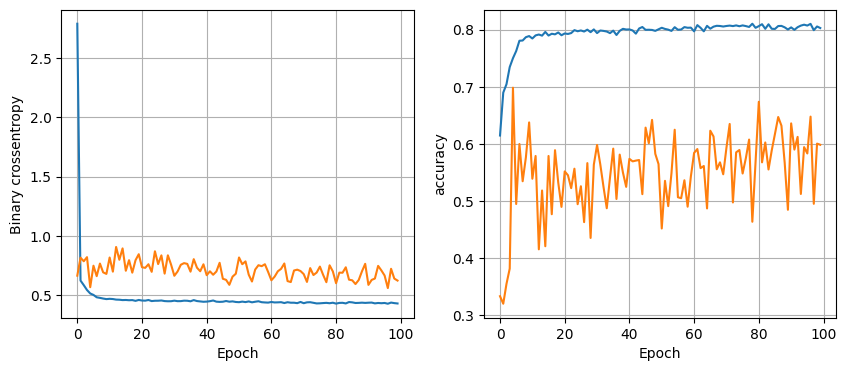

119/119 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8304
Validation Loss: 0.38843730092048645
16 nodes, dropout 0.2, lr 0.05,batch size 32


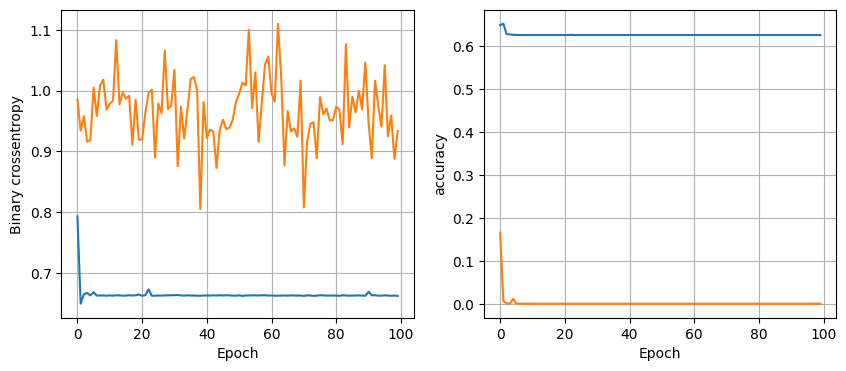

119/119 [==============================] - 0s 2ms/step - loss: 0.6499 - accuracy: 0.6535
Validation Loss: 0.6498931646347046
16 nodes, dropout 0.2, lr 0.05,batch size 64


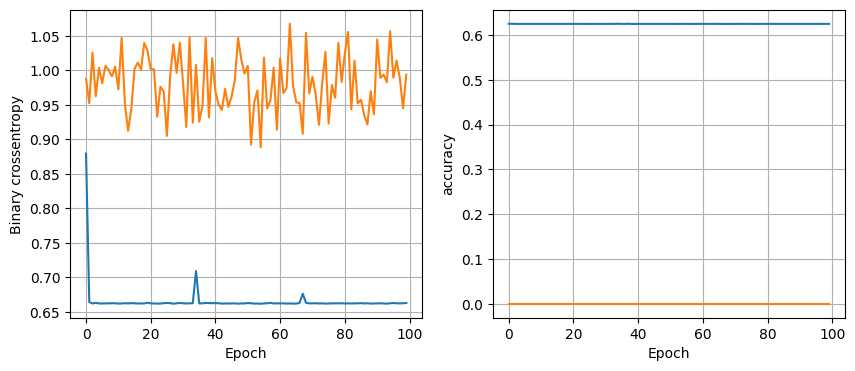

119/119 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6535
Validation Loss: 0.6464537382125854
16 nodes, dropout 0.2, lr 0.05,batch size 128


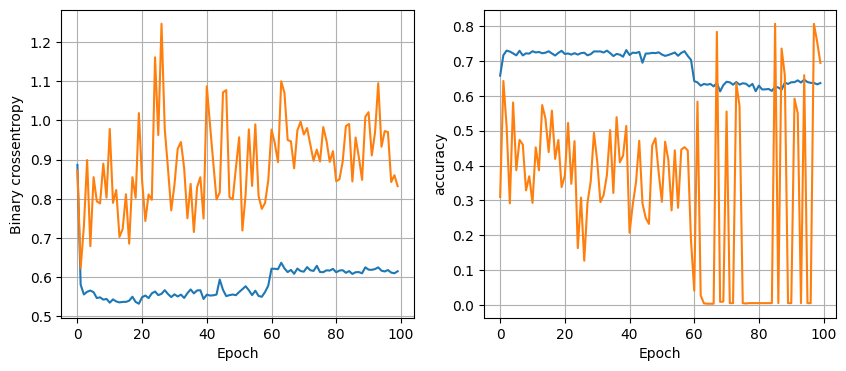

119/119 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7379
Validation Loss: 0.5540618896484375
16 nodes, dropout 0.2, lr 0.001,batch size 32


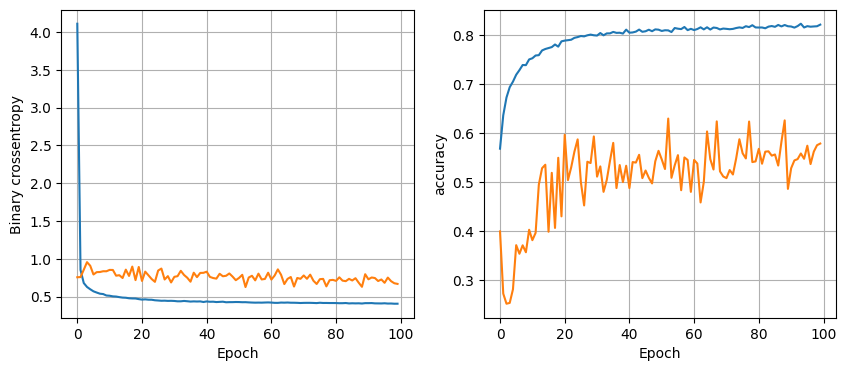

119/119 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8310
Validation Loss: 0.40243372321128845
16 nodes, dropout 0.2, lr 0.001,batch size 64


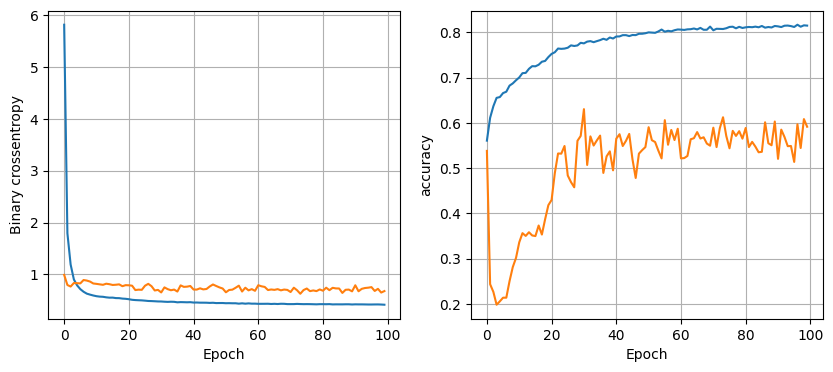

119/119 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8275
Validation Loss: 0.4021870493888855
16 nodes, dropout 0.2, lr 0.001,batch size 128


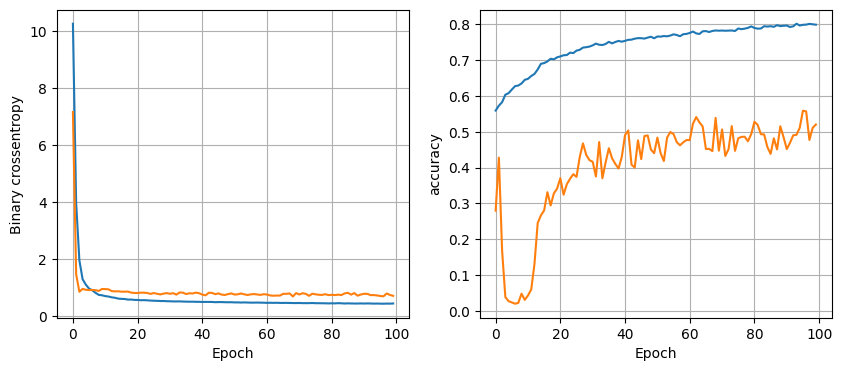

119/119 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8215
Validation Loss: 0.40916770696640015
32 nodes, dropout 0, lr 0.01,batch size 32


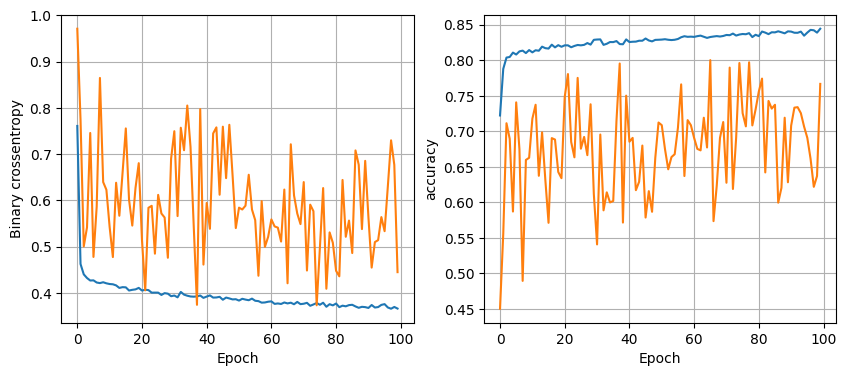

119/119 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8417
Validation Loss: 0.3763481378555298
32 nodes, dropout 0, lr 0.01,batch size 64


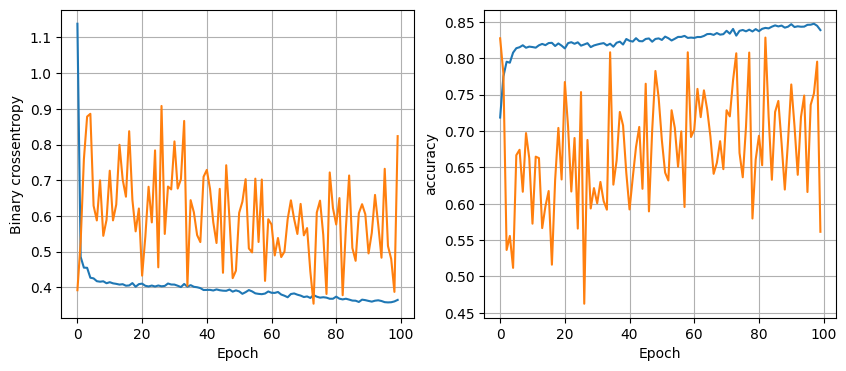

119/119 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8265
Validation Loss: 0.39479362964630127
32 nodes, dropout 0, lr 0.01,batch size 128


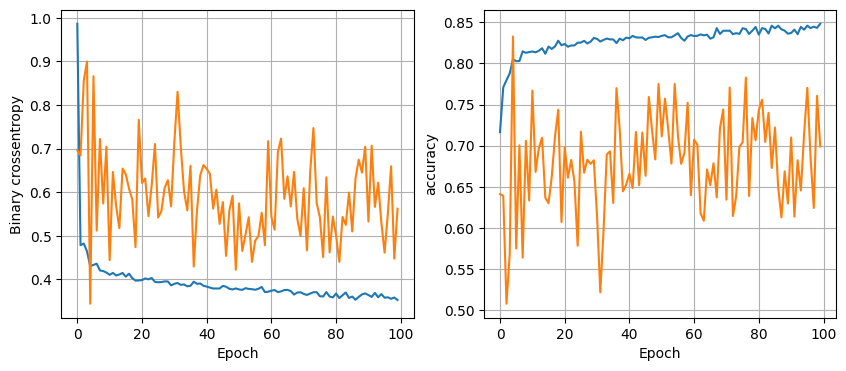

119/119 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8473
Validation Loss: 0.37400344014167786
32 nodes, dropout 0, lr 0.05,batch size 32


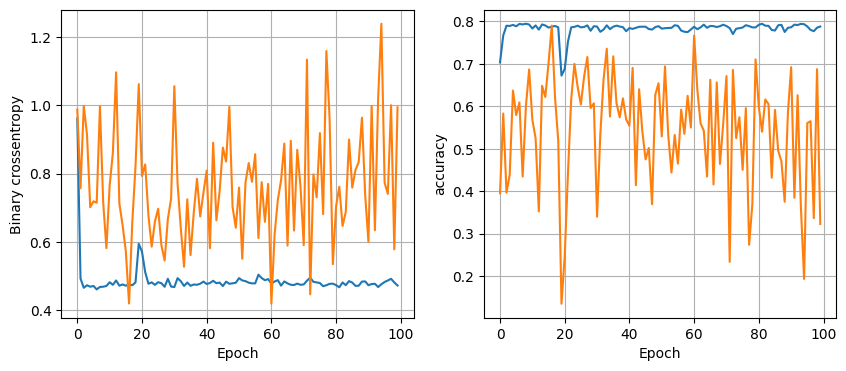

119/119 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7681
Validation Loss: 0.48738646507263184
32 nodes, dropout 0, lr 0.05,batch size 64


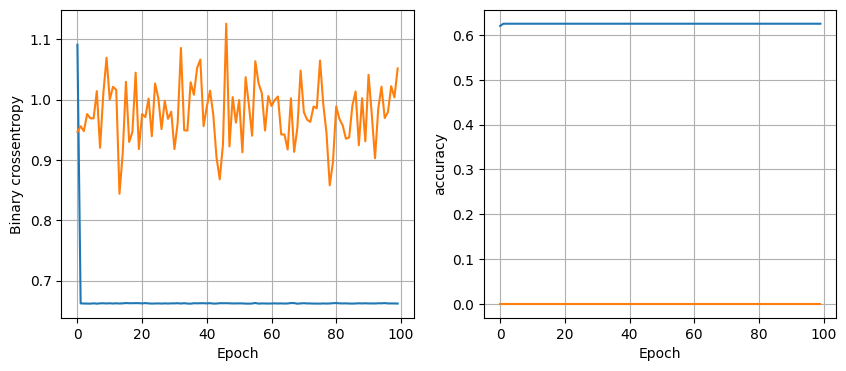

119/119 [==============================] - 0s 2ms/step - loss: 0.6453 - accuracy: 0.6535
Validation Loss: 0.6452564001083374
32 nodes, dropout 0, lr 0.05,batch size 128


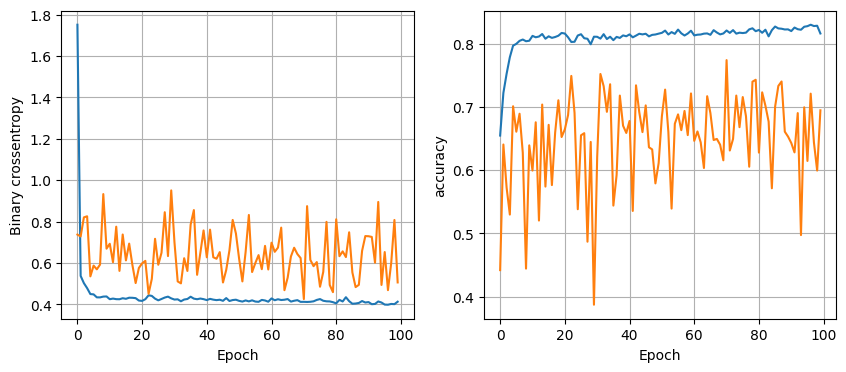

119/119 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8404
Validation Loss: 0.3929594159126282
32 nodes, dropout 0, lr 0.001,batch size 32


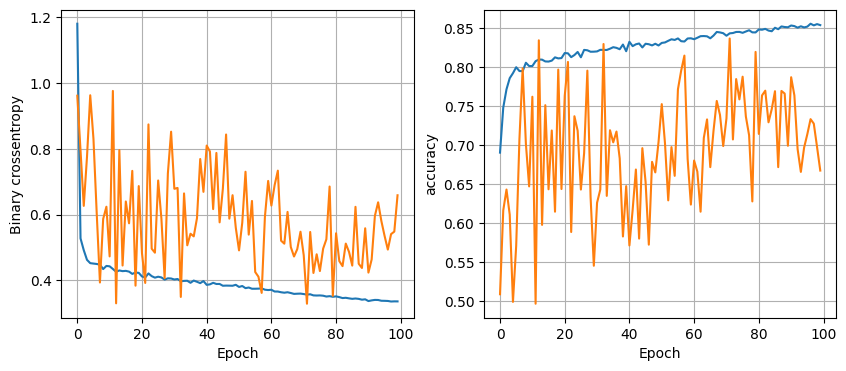

119/119 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8467
Validation Loss: 0.39022141695022583
32 nodes, dropout 0, lr 0.001,batch size 64


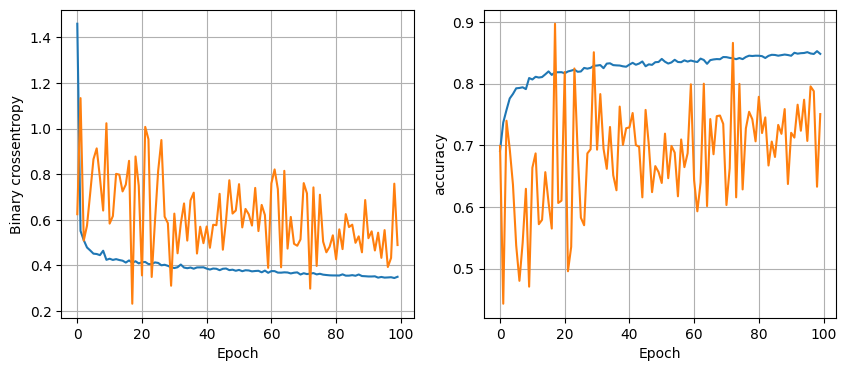

119/119 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8373
Validation Loss: 0.3905545175075531
32 nodes, dropout 0, lr 0.001,batch size 128


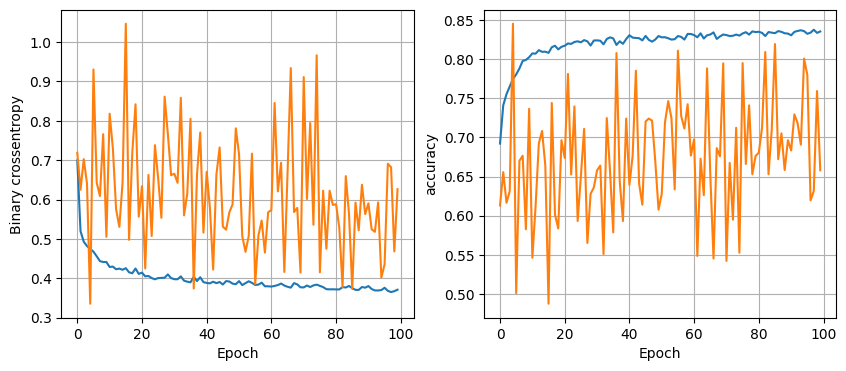

119/119 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8410
Validation Loss: 0.3749557435512543
32 nodes, dropout 0.2, lr 0.01,batch size 32


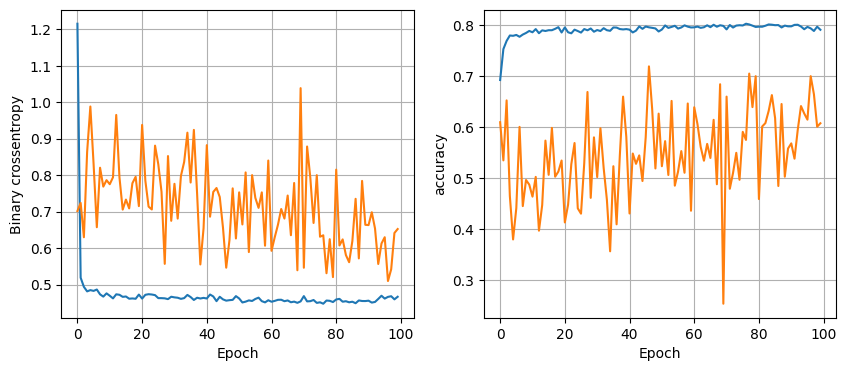

119/119 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8307
Validation Loss: 0.40155237913131714
32 nodes, dropout 0.2, lr 0.01,batch size 64


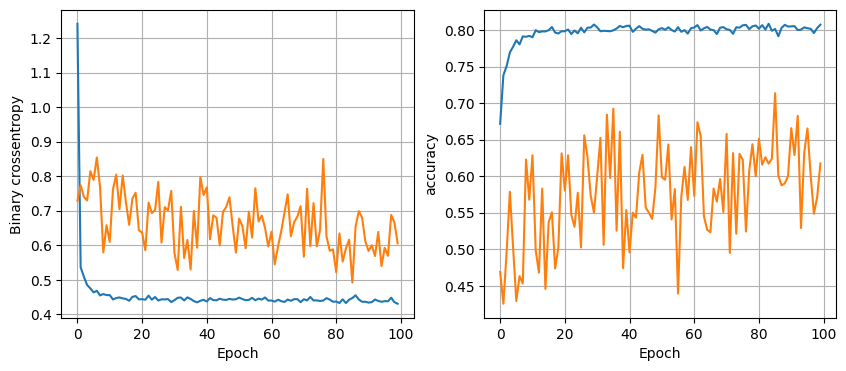

119/119 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8283
Validation Loss: 0.3950043320655823
32 nodes, dropout 0.2, lr 0.01,batch size 128


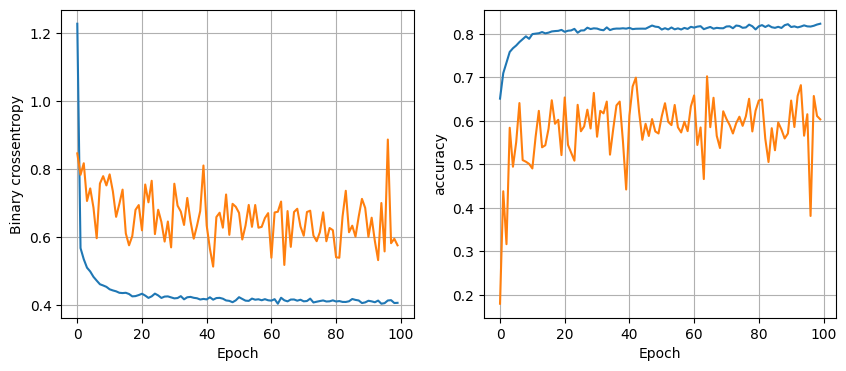

119/119 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8320
Validation Loss: 0.38252976536750793
32 nodes, dropout 0.2, lr 0.05,batch size 32


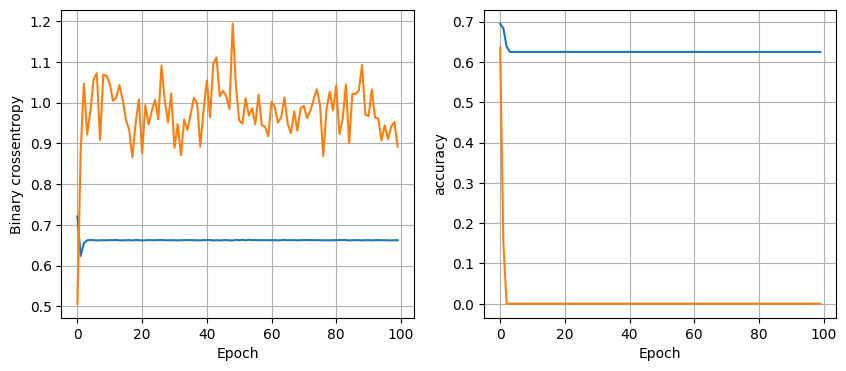

119/119 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.6535
Validation Loss: 0.6536896824836731
32 nodes, dropout 0.2, lr 0.05,batch size 64


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.050,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr},batch size {batch_size}")
        model, history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,y_valid)[0]
        print("Validation Loss:", val_loss)
        if val_loss<least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred))